This notebook looks at the behavioral data collected as part of the LEMON Project. We'd like to know which of these questionaaire might be a better choice for a classification task. So our first question would be what can resting state EEG data reveal about which people's current mental state, and their emotional and cognitive abilities. 

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sns.set_theme(style="whitegrid")
# sns.set_context("paper", font_scale=1.5)
data_dir = 'data/LEMON_data/behavioral/Behavioural_Data_MPILMBB_LEMON/'
data_dir = data_dir + 'Emotion_and_Personality_Test_Battery_LEMON/'

# helper functions
def plot_hist(data, bins=10):
    columns = data.columns
    if len(columns) == 1:
            plt.figure(figsize=(5, 5))
            sns.histplot(data[columns[0]], bins=bins, kde=True)
    elif len(columns)%2 == 0:
        fig, ax = plt.subplots(len(columns)//2, 2, figsize=(8, 3*len(columns)//2), sharey=True)
        for j, col in enumerate(columns):
            if len(columns)//2 == 1:
                sns.histplot(data[col], bins=bins, ax=ax[j%2], kde=True)
            else:
                sns.histplot(data[col], bins=bins, ax=ax[j//2, j%2], kde=True)
    elif len(columns) <= 5:
        fig, ax = plt.subplots(1, len(columns), figsize=(5*len(columns), 5), sharey=True)
        for j, col in enumerate(columns):
            sns.histplot(data[col], bins=bins, ax=ax[j], kde=True)
    elif len(columns) // 3 == 0:
        fig, ax = plt.subplots(len(columns)//3, 3, figsize=(5*3, 5*len(columns)//3))
        for j, col in enumerate(columns):
            sns.histplot(data[col], bins=bins, ax=ax[j//3, j%3], kde=True)
    else:
        fig, ax = plt.subplots(1, len(columns), figsize=(5*len(columns), 5), sharey=True)
        for j, col in enumerate(columns):
            sns.histplot(data[col], bins=bins, ax=ax[j], kde=True)

## Personality and Emotions

### MDBF

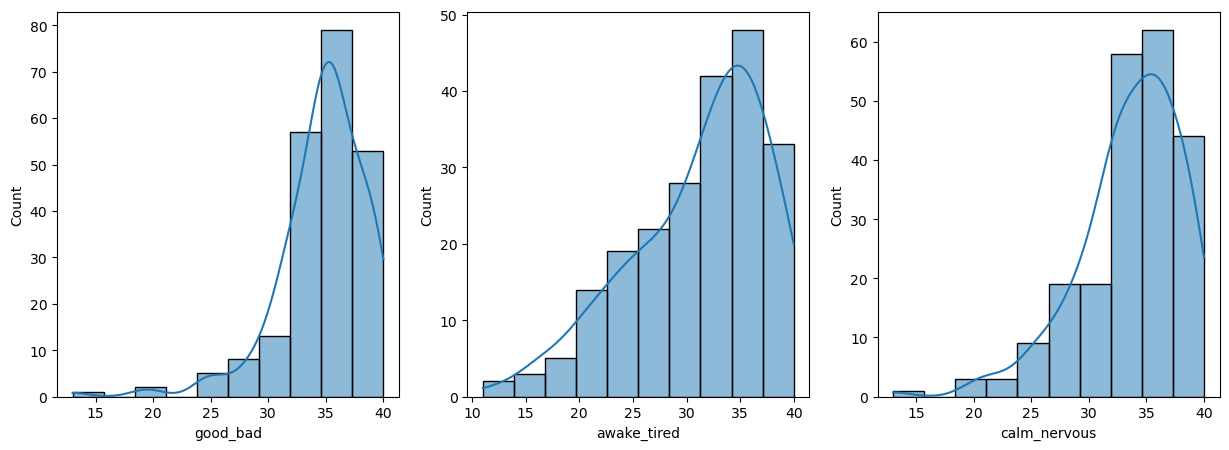

In [12]:
data = pd.read_csv(data_dir+'MDBF_Day2.csv',
                   index_col=0)
data.rename(columns={'MDBF_Day2_RU_Scale': 'calm_nervous',
                     'MDBF_Day2_WM_Scale': 'awake_tired',
                     'MDBF_Day2_GS_Scale': 'good_bad'}, inplace=True)
data.describe()

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(data.columns):
    sns.histplot(data[col], bins=10, kde=True, ax=ax[i])

### Other Questionaires

1 PSQ
﻿PSQ
Perceived Stress Questionnaire (Short version)

References
1. Levenstein, S., Prantera, C., Varvo, V., Scribano, M. L., Berto, E., Luzi, C., & Andreoli, A. (1993). Development of the Perceived Stress Questionnaire: a new tool for psychosomatic research. Journal of psychosomatic research, 37(1), 19-32.
2. Fliege, H., Rose, M., Arck, P., Levenstein, S. & Klapp, B.F. (2001). Validierung des "Perceived Stress Questionnaire" (PSQ) an einer deutschen Stichprobe. Diagnostica, 47 (3), 142-152.


Timeframe
Last 2 years

20 Items

Response scores:
from 1 (almost never) to 4 (usually).

1 = fast nie
2 = manchmal
3 = häufig
4 = meistens


Subscales/Columns:
PSQ_Worries: Worries	
PSQ_Tension: Tension	
PSQ_Joy: Joy	
PSQ_Demands: Demands 	
PSQ_OverallScore: OverallScore


4 MARS
﻿MARS
Measure of Affect Regulation Style

References:
1. Larsen, R. J. & Prizmic, Z. (2004). Affect regulation. In: Baumeister, R. F. & Vohs, K. D. (Eds) Handbook of self-regulation: Research, theory, and applicati

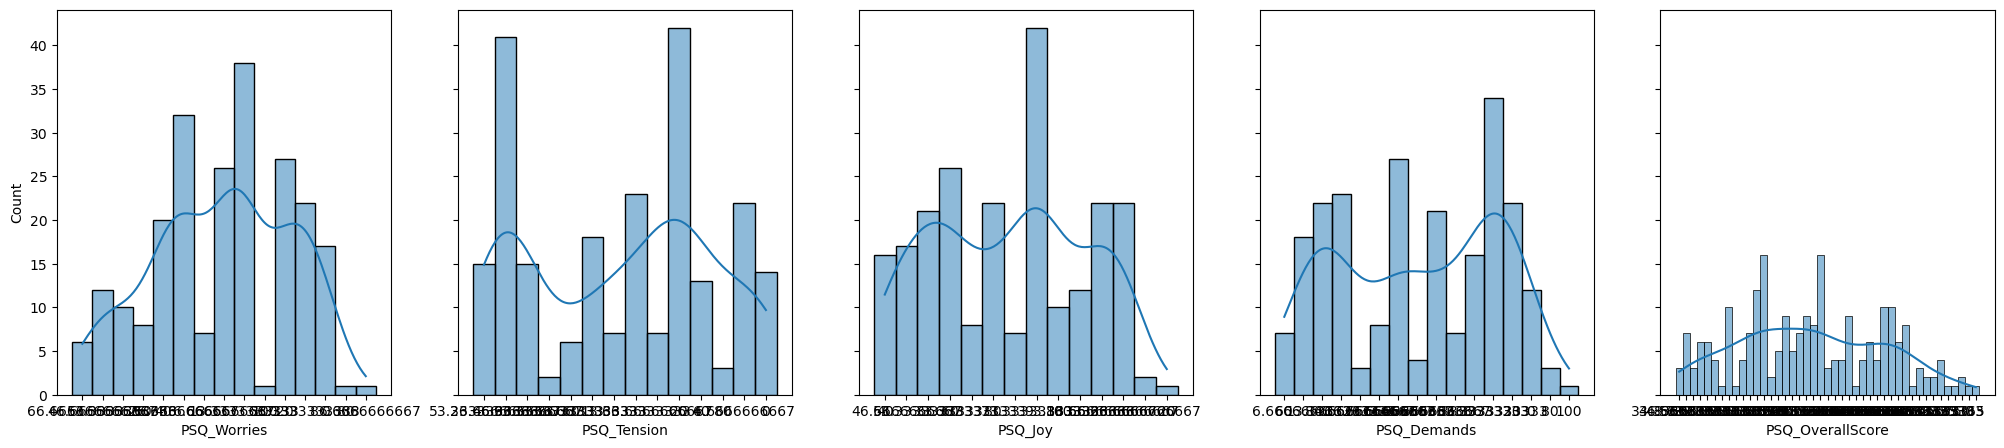

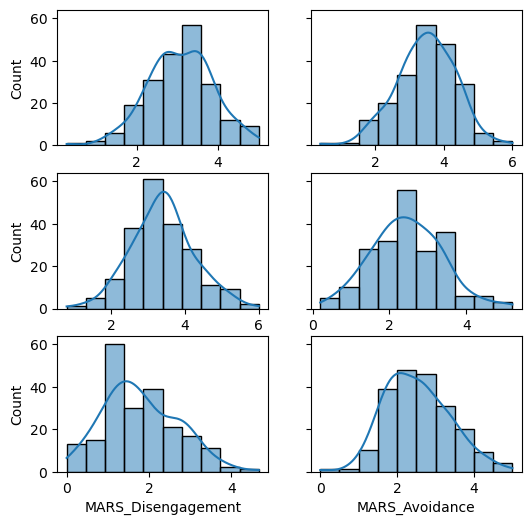

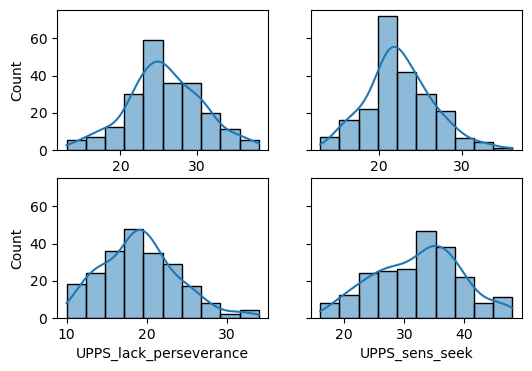

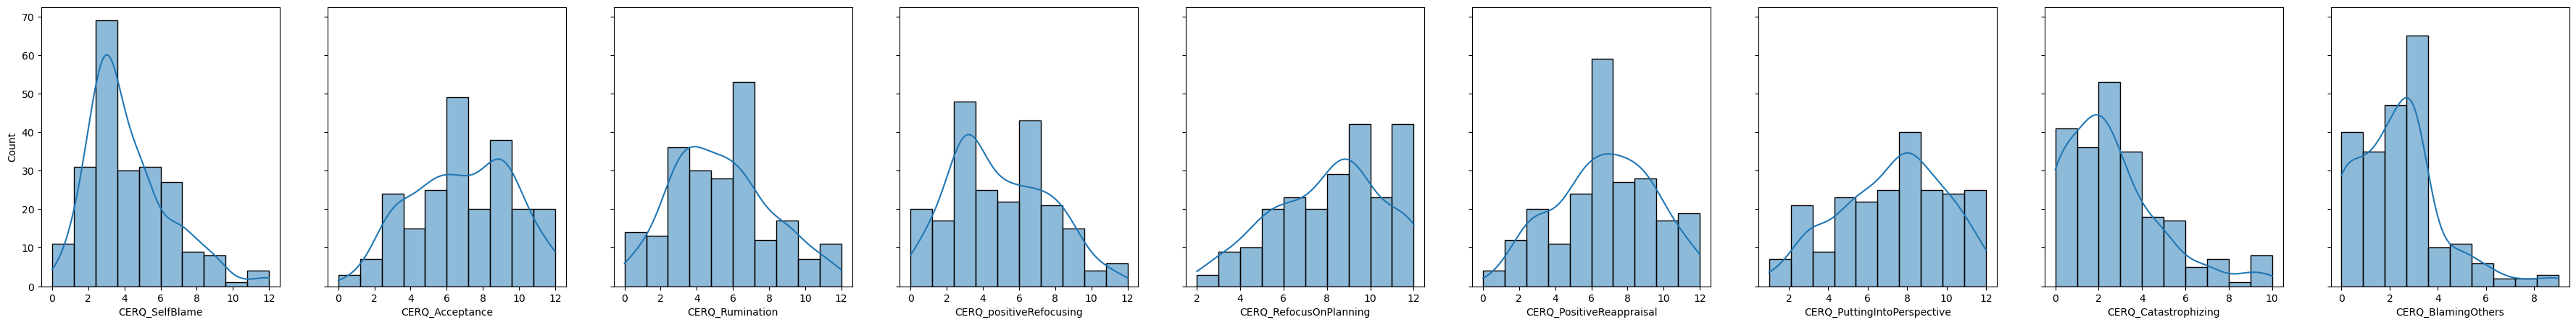

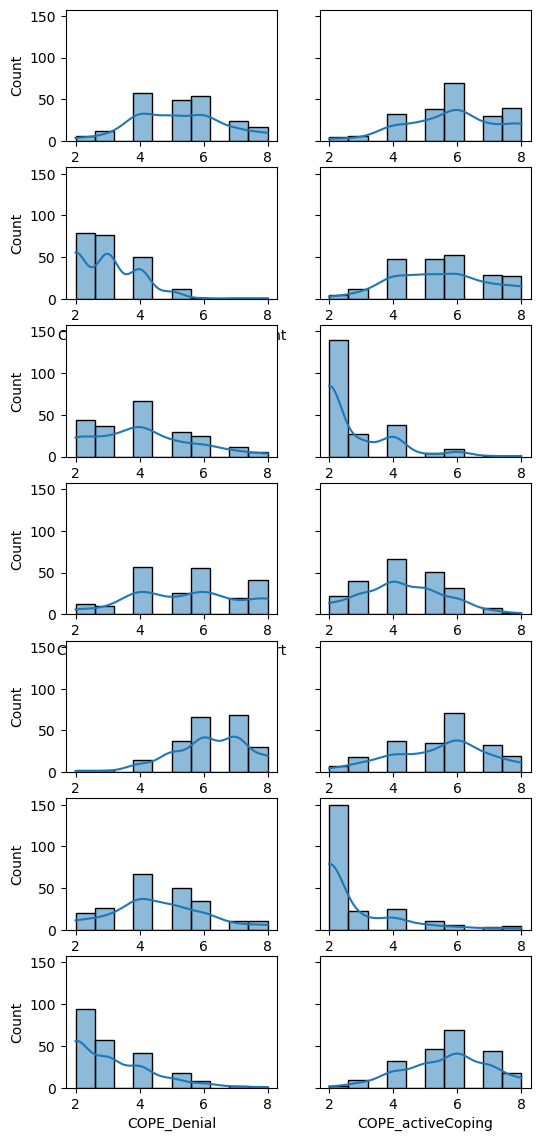

In [20]:
from pathlib import Path

for i, path in enumerate(list(Path(data_dir).rglob('*.csv'))[15:]):
    # check if it is plotted
    above_plotted = ['MDBF', 'STAXI', 'NYC_Q', 'YFAS']
    if path.stem.split('_')[0] in above_plotted:
        continue

    # print questionnaire's info
    print(i+1, '\033[1m' + path.stem + '\033[0m')
    with open(path.parent / (path.stem + '_info.txt'), 'r') as f:
        print(f.read())
    
    # open the data and plot histogram
    data = pd.read_csv(path, index_col=0)
    plot_hist(data)

### Extract labels

In [ ]:
questionnaires = ['TEIQue-SF', 'ERQ', 'CERQ', 'COPE', 'MARS', 'TAS', 'PSQ']
name = questionnaires[2]
data = pd.read_csv(data_dir+f'{name}.csv', index_col=0)

## Meta data
Merge meta data with eeg xarray

In [103]:
import xarray as xr
data_dir = 'data/LEMON_data/behavioral/Behavioural_Data_MPILMBB_LEMON/'
meta_data = pd.read_csv(data_dir+'META_File_IDs_Age_Gender_Education_Drug_Smoke_SKID_LEMON.csv', index_col=0)

# eeg xarray
data = xr.open_dataset('data/LEMON_data/xarray/processed/normalized_clamped/eeg_EC_BaseCorr_Norm_Clamp_with_pos.nc5')

# find sub_ids that their eeg data is not available
l_x = list(data.subject.values)
l_g = list(meta_data.index)
no_eeg = [i for i in l_g if i not in l_x]

# remove them from the meta data
meta_data = meta_data.query('index not in @no_eeg')
gender = meta_data['Gender_ 1=female_2=male'].sort_index()
gender = gender.replace({1:'female', 2:'male'})

# check if the sorted order is the same
if (gender.index == data.subject.values).all():
    # add sorted gender as a new attribute to the eeg xarray
    data.attrs['gender'] = gender.values

    # # save the new xarray
    # data.to_netcdf('data/LEMON_data/xarray/processed/normalized_clamped/eeg_EC_BaseCorr_Norm_Clamp_with_pos.nc5',
    #                engine='h5netcdf')

True